# LIVER DISEASE PREDICTION 

**IMPORT LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

**LOADING DATA**

In [3]:
df = pd.read_csv('Liver_disease_data.csv')

**EXPLORATORY DATA ANALYSIS**

In [5]:
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [6]:
df.isnull().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

In [7]:
df.dtypes

Age                     int64
Gender                  int64
BMI                   float64
AlcoholConsumption    float64
Smoking                 int64
GeneticRisk             int64
PhysicalActivity      float64
Diabetes                int64
Hypertension            int64
LiverFunctionTest     float64
Diagnosis               int64
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis'],
      dtype='object')

In [10]:
df.corr()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
Age,1.000000,-0.009323,0.038283,0.008236,-0.013683,-0.012948,-0.015212,0.024209,0.000678,-0.013105,0.156099
Gender,-0.009323,1.000000,0.013458,-0.003312,-0.023403,0.017394,0.009379,0.000012,0.024131,0.024603,0.189558
BMI,0.038283,0.013458,1.000000,-0.024749,-0.018322,-0.007686,-0.010888,-0.007808,-0.004850,0.043684,0.167655
AlcoholConsumption,0.008236,-0.003312,-0.024749,1.000000,-0.013794,-0.016808,-0.024232,0.013490,0.016640,-0.043480,0.349610
Smoking,-0.013683,-0.023403,-0.018322,-0.013794,1.000000,-0.007374,0.007054,0.001455,0.040314,0.000838,0.200071
GeneticRisk,-0.012948,0.017394,-0.007686,-0.016808,-0.007374,1.000000,-0.011594,-0.010785,0.018990,-0.008061,0.118292
PhysicalActivity,-0.015212,0.009379,-0.010888,-0.024232,0.007054,-0.011594,1.000000,-0.006939,0.018569,-0.010393,-0.116689
Diabetes,0.024209,0.000012,-0.007808,0.013490,0.001455,-0.010785,-0.006939,1.000000,0.049166,0.018153,0.107480
Hypertension,0.000678,0.024131,-0.004850,0.016640,0.040314,0.018990,0.018569,0.049166,1.000000,0.007847,0.170683
LiverFunctionTest,-0.013105,0.024603,0.043684,-0.043480,0.000838,-0.008061,-0.010393,0.018153,0.007847,1.000000,0.354003


In [11]:
df = df.drop(['PhysicalActivity'],axis=1)

**SPLITTING DATA**

In [13]:
x = df.drop(['Diagnosis'],axis = 1)

In [14]:
y = df['Diagnosis']

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [17]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [18]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,

In [19]:
model_score = model.score(x_test,y_test)
print(model_score)

0.807843137254902


<Axes: >

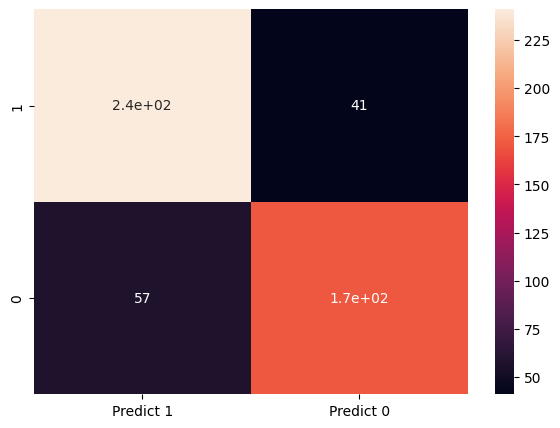

In [20]:
# CONFUSION MATRIX 

from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_predict,labels=[1,0])

df_cm = pd.DataFrame(cm , index =[i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier()

In [23]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
rfc_predict = rfc.predict(x_test)

In [25]:
rfc_score = rfc.score(x_test,y_test)
print(rfc_score)

0.8549019607843137


<Axes: >

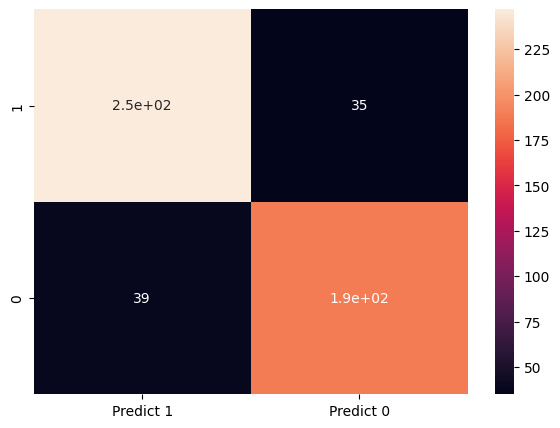

In [26]:
# CONFUSION MATRIX 

from sklearn import metrics
cm = metrics.confusion_matrix(y_test,rfc_predict,labels=[1,0])

df_cm = pd.DataFrame(cm , index =[i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)